# Prueba de Sensibilidad
## Importar librerias

In [52]:
# Pruebas de sensibilidad
import pandas as pd
import numpy as np

#--------Grafico 1: Graficos 2D de HI del componente VS HI del parametro que varía-----------
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
#from mpl_toolkits.mplot3d import Axes3D
#import plotly.graph_objects as go
#import plotly.express as px

from colour import Color


##  1: Modificar parámetros 

In [53]:
#----------- Valores a editar por combinación -----------
activo ='RC'
compo = 'Total'

#---MODIFICAR LOS PARAMETROS: --------#

param =['Tanque','Ubicación','Inspección']          #Anotar el nombre de los parametros
par1,par2,par3 = 0,1,2                             #par1 será el parametro a variar su HI
                                                    #par2 varía su peso con par1
                                                    #par3 permanece constante
    
pesos_pre =[0.4,0.35,0.25]                          #Anotar el valor predefinido de los parametro
ind_pred = 50.0                                     #Valor predeterminado de indice

#------ Definir variación de indices--------
y=list(range(0,101))                             #Desde 0 hasta 100 (101-1) con paso de 10         

#--------- Variacion de pesos --------------
salto, Max = 0.1,0.3


# Calculo de HI's

In [54]:
#---Crear variación de los pesos-----
xx =list()                                                               #Crear lista de variación

for i in range(int(((Max*2)/salto)+1)):                                  #Asigna de valores a la lista 
    xx.append(float("{:.2f}".format(i*salto-Max)))

#-----Crear variación de los pesos-------

pesos = pd.DataFrame()                                                   #crear dataframe, nombrar según combinacion
for i in range(len(param)):                                              #agregar tabla segun numero de parametros
    pesos[param[i]]='' 
    pesos.at[0,param[i]]= pesos_pre[i]

if (pesos[param[par1]][0])<0.3:
    for i in range(len(xx)):
        xx[i]=xx[i]+0.15
    
for i in range(len(xx)):
    j = float("{:.2f}".format(pesos[param[par1]][0] + xx[i]))            #Hallar peso nuevo
    if( j + pesos[param[par3]][0] <= 1):                                 #tener en cuenta que no pase de 1
        if (j >= 0):
            pesos.at[i+1,param[par1]]=j
        elif(j < 0): 
            pesos.at[i,param[par1]]=0                                   #Igualar a 0 o 1 si se pasa de los limites
    else:
        nada='nada'

#----Asignar los valores del segundo peso que depende de los demás-------
    pesos.at[i+1,param[par3]] = pesos[param[par3]][0]
    pesos.at[i+1,param[par2]]= 1 - pesos[param[par1]][i+1]- pesos[param[par3]][i+1]
pesos = pesos.drop(0, axis=0)                                          #Eliminar el valor del peso predefinido repetido
pesos

,Tanque,Ubicación,Inspección
1,0.1,0.65,0.25
2,0.2,0.55,0.25
3,0.3,0.45,0.25
4,0.4,0.35,0.25
5,0.5,0.25,0.25
6,0.6,0.15,0.25


In [55]:
#--Crear escenarios: Cada escenario varía el HI del parámetro, y se repite variando su peso

#----Crear tabla de HI

hi=pd.DataFrame()   
for i in range(len(param)):
    hi['HI '+param[i]]=''                                      #Crear columnas de HI de cada parámetro

for i in range(hi.shape[1]):                                   #Asignar valores predeterminados de indices
    for j in range(len(y)):
        hi.at[j,'HI '+param[i]]=ind_pred

for i in range(hi.shape[0]):                                   #Asignar valores de variación
    hi.at[i,'HI '+param[par1]]=float(y[i])                      #Asignar rango de variación
 
#Asignar valores variables del indice al parametro
hi['HI '+param[par1]]= hi['HI '+param[par1]].values[::-1]        #Ordenar valores que varían(de 100 a 0)

for k in range(pesos.shape[0]):                                #Asignar indice de salud al componente
    hi['HI '+compo+' '+str(k+1)]=0.0
    for j in range(hi.shape[0]):
        for i in range(len(param)):
            z = float(hi['HI '+param[i]][j]*pesos[param[i]][k+1])
            hi.at[j,'HI '+compo+' '+str(k+1)]+=float(z)
        hi.at[j,'HI '+compo+' '+str(k+1)]+=1.0

hi

,HI Tanque,HI Ubicación,HI Inspección,HI Total 1,HI Total 2,HI Total 3,HI Total 4,HI Total 5,HI Total 6
0,100.0,50.0,50.0,56.0,61.0,66.0,71.0,76.0,81.0
1,99.0,50.0,50.0,55.9,60.8,65.7,70.6,75.5,80.4
2,98.0,50.0,50.0,55.8,60.6,65.4,70.2,75.0,79.8
3,97.0,50.0,50.0,55.7,60.4,65.1,69.8,74.5,79.2
4,96.0,50.0,50.0,55.6,60.2,64.8,69.4,74.0,78.6
...,...,...,...,...,...,...,...,...,...
96,4.0,50.0,50.0,46.4,41.8,37.2,32.6,28.0,23.4
97,3.0,50.0,50.0,46.3,41.6,36.9,32.2,27.5,22.8
98,2.0,50.0,50.0,46.2,41.4,36.6,31.8,27.0,22.2
99,1.0,50.0,50.0,46.1,41.2,36.3,31.4,26.5,21.6


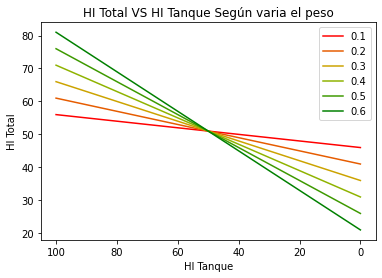

In [57]:
#--------Grafico 1: Graficos 2D de HI del componente VS HI del parámetro variado-----------
red = Color("red")
colors = list(red.range_to(Color("green"),pesos.shape[0]))
ax = plt.gca()


for i in range(pesos.shape[0]):
    #hi.plot(kind='scatter',x='HI '+param[par1], y='HI '+compo+' '+str(i+1),ax=ax,color= str(colors[i]),title =title,label=str(pesos3[param[par1][i+1]]))
    label = str(pesos[param[par1]][i+1])
    title = 'HI '+compo+' VS HI '+param[par1]+' Según varia el peso'
    hi.plot(kind='line',x='HI '+param[par1], y='HI '+compo+' '+str(i+1),title=title,color =str(colors[i]),ax=ax,label=label)
    plt.xlim(max(hi['HI '+param[par1]])+5, min(hi['HI '+param[par1]])-5)
plt.ylabel("HI "+compo)
plt.savefig(activo+"_"+compo+"_"+param[par1].upper()+'_'+param[par2]+'_.png',dpi=200)

plt.show()